# Clinical Trials Participant Demographics - Asian Representation

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [150]:
import numpy as np

df = pd.read_csv('Clinical Trials Data, Compiled and Cleaned - [FDA] Drug Trials Snapshots_ All .csv')

# Data Acquisition

I chose the data set "Clinical Trial Participation Demographics" from ProPublica Data Store. This dataset displays a demographic breakdown of racial representation in clinical trials conducted for FDA-approved drugs between the time of January 2015 to June 2018. Here we have columns labeled: Brand Name, Indication, Women, White, Black or African American, Asian, All Other, Hispanic or Latino, US Only, Age ≥65, Age ≥75, Age ≥80, and Year.


In [3]:
df.head()

,BRAND NAME,INDICATION,WOMEN,WHITE,BLACK OR AFRICAN AMERICAN,ASIAN,"ALL OTHER (Aggregated):\nAmerican Indian or Alaska Native (AI/AN), Native Hawaiian or Other Pacific Islander (NH/OPI), Unknown/Unreported",HISPANIC OR LATINO (2017 AND LATER ONLY),UNITED STATES (2017 ONLY),AGE\n65 and OLDER,AGE\n75 and OLDER,AGE\n80 and OLDER,YEAR,NOTES
0,ADDYI,"Treatment of acquired, generalized hypoactive ...",100%,89%,8%,1%,2%,NaN,NaN,0%,0%,0%,2015,NaN
1,ALECENSA,For the treatment of metastatic non-small cell...,55%,74%,2%,18%,7%,NaN,NaN,14%,4%,<1%,2015,NaN
2,ARISTADA,Treatment of schizophrenia,32%,47%,40%,13%,<1%,NaN,NaN,0%,0%,0%,2015,NaN
3,AVYCAZ,Treatment of complicated intra-abdominal infec...,26%,60%,<1%,27%,12%,NaN,NaN,11%,8%,4%,2015,NaN
4,AVYCAZ,Treatment of complicated urinary tract infecti...,74%,60%,5%,10%,25%,NaN,NaN,17%,4%,3%,2015,NaN


In [4]:
print(len(df))

155


In [5]:
print(type(df))

<class 'pandas.core.frame.DataFrame'>


These are the listed FDA-approved drugs given in the clinical trials under the column "Brand Name".

In [7]:
df['BRAND NAME']

0          ADDYI
1       ALECENSA
2       ARISTADA
3         AVYCAZ
4         AVYCAZ
         ...    
150    TAVALISSE
151      TIBSOVO
152        TPOXX
153     TROGARZO
154       ZEMDRI
Name: BRAND NAME, Length: 155, dtype: object

If we were to display the fifth row in the column "Brand Name" we're given the drug Bridion, this provides treatment for  the reversal of the effects of certain neuromuscular blocking agents.

In [8]:
df['BRAND NAME'][5]

'BRIDION'

In [9]:
for col in df.columns:
    print(col, type(df[col][0]))

BRAND NAME <class 'str'>
INDICATION <class 'str'>
WOMEN <class 'str'>
WHITE <class 'str'>
BLACK OR AFRICAN AMERICAN <class 'str'>
ASIAN <class 'str'>
ALL OTHER (Aggregated):
American Indian or Alaska Native (AI/AN), Native Hawaiian or Other Pacific Islander (NH/OPI), Unknown/Unreported <class 'str'>
HISPANIC OR LATINO (2017 AND LATER ONLY) <class 'float'>
UNITED STATES (2017 ONLY) <class 'float'>
AGE
65 and OLDER <class 'str'>
AGE
75 and OLDER <class 'str'>
AGE
80 and OLDER <class 'str'>
YEAR <class 'numpy.int64'>
NOTES <class 'float'>


In [10]:
df.describe()

,YEAR
count,155.000000
mean,2016.303226
std,1.141736
min,2015.000000
25%,2015.000000
50%,2016.000000
75%,2017.000000
max,2018.000000


# Data Processing
Here we are cleaning the race column values that are originally strings `str`, in order to provide a visual we have to change the data type to a float value. We do this by converting our given percentages to decimals using the following code seen below. This step is repeated throughout the dataset for each race column, and included after is a bar graph (color coded for each race) displaying the racial representation of patients within the clinical trials.

In [107]:
df['ASIAN'] = df['ASIAN'].str.replace('<', '')
df = df[df['ASIAN'] != 'NR']
df['ASIAN'] = df['ASIAN'].str.rstrip('%').astype('float') / 100.0

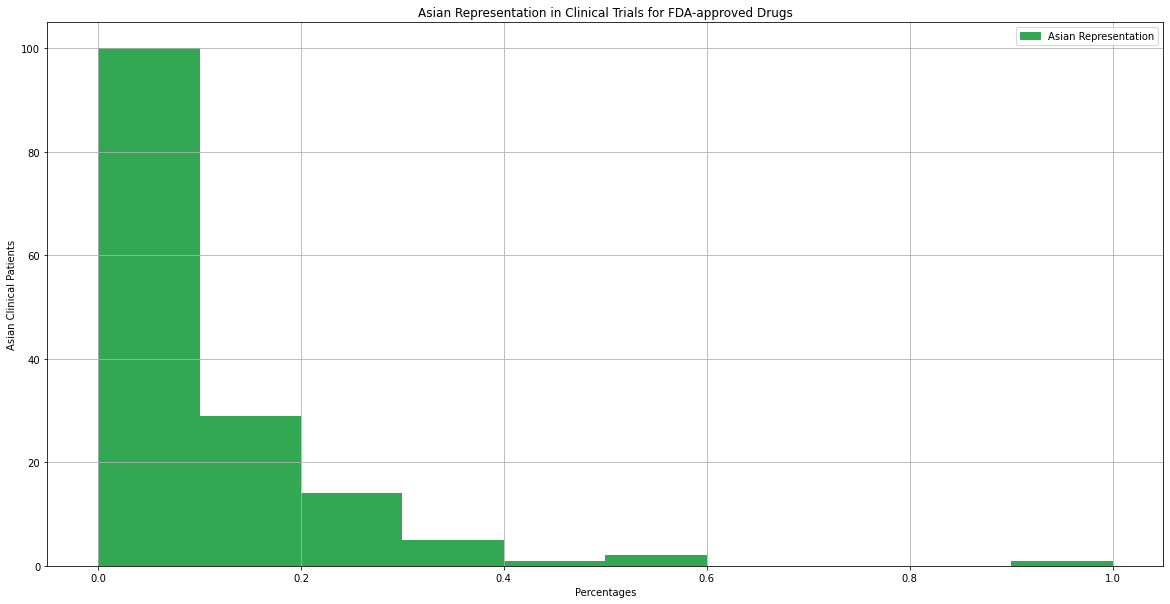

In [148]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

df.hist(column='ASIAN',color="#32a852")
colors = {'Asian Representation':'#32a852'}         
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
plt.legend(handles, labels)
plt.ylabel('Asian Clinical Patients')
plt.xlabel('Percentages')
plt.title('Asian Representation in Clinical Trials for FDA-approved Drugs')
plt.rcParams["figure.figsize"]=(20,10)

plt.show()

In [146]:
df['WHITE'] = df['WHITE'].str.replace('<', '')
df = df[df['WHITE'] != 'NR']
df['WHITE'] = df['WHITE'].str.rstrip('%').astype('float') / 100.0

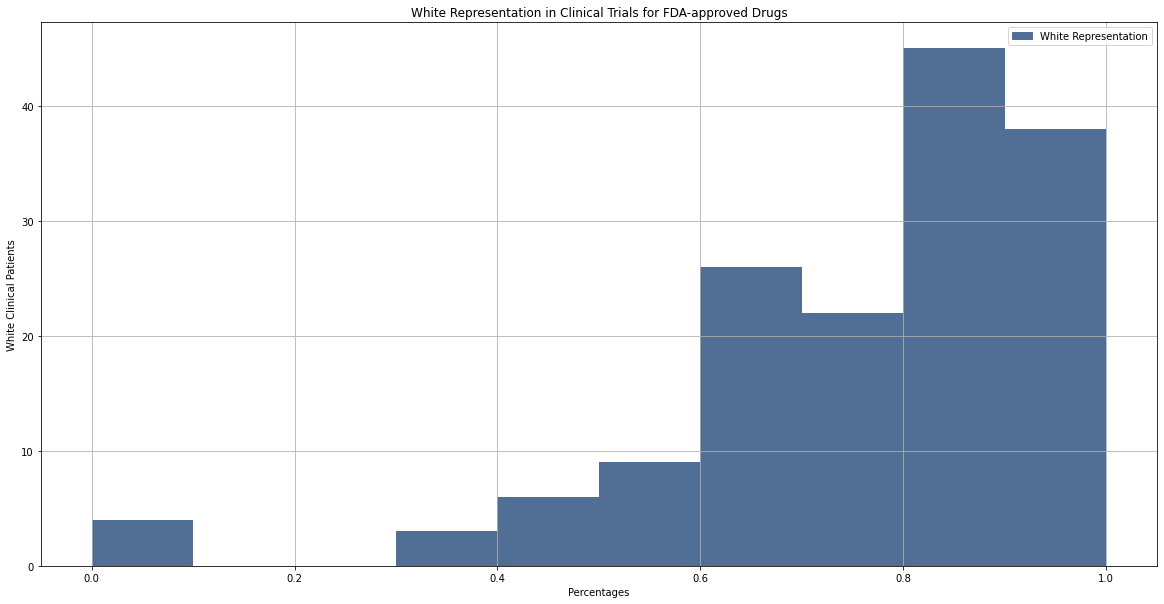

In [147]:
import matplotlib.pyplot as plt

df.hist(column='WHITE',color="#516f94")
colors = {'White Representation':'#516f94'}         
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
plt.legend(handles, labels)
plt.ylabel('White Clinical Patients')
plt.xlabel('Percentages')
plt.title('White Representation in Clinical Trials for FDA-approved Drugs')
plt.rcParams["figure.figsize"]=(20,10)

plt.show()

In [151]:
df['BLACK OR AFRICAN AMERICAN'] = df['BLACK OR AFRICAN AMERICAN'].str.replace('<', '')
df = df[df['BLACK OR AFRICAN AMERICAN'] != 'NR']
df['BLACK OR AFRICAN AMERICAN'] = df['BLACK OR AFRICAN AMERICAN'].str.rstrip('%').astype('float') / 100.0

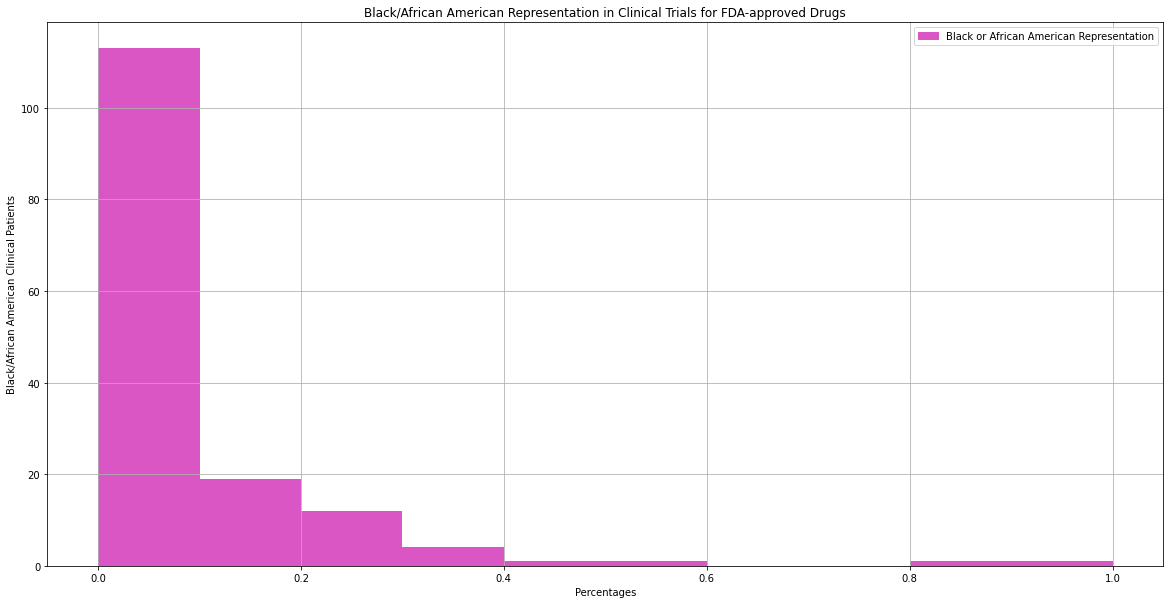

In [152]:
import matplotlib.pyplot as plt

df.hist(column='BLACK OR AFRICAN AMERICAN',color="#db56c5")
colors = {'Black or African American Representation':'#db56c5'}         
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
plt.legend(handles, labels)
plt.ylabel('Black/African American Clinical Patients')
plt.xlabel('Percentages')
plt.title('Black/African American Representation in Clinical Trials for FDA-approved Drugs')
plt.rcParams["figure.figsize"]=(20,10)

plt.show()

In [154]:
df['ALL OTHER (Aggregated):\nAmerican Indian or Alaska Native (AI/AN), Native Hawaiian or Other Pacific Islander (NH/OPI), Unknown/Unreported'] = df['ALL OTHER (Aggregated):\nAmerican Indian or Alaska Native (AI/AN), Native Hawaiian or Other Pacific Islander (NH/OPI), Unknown/Unreported'].str.replace('<', '')
df = df[df['ALL OTHER (Aggregated):\nAmerican Indian or Alaska Native (AI/AN), Native Hawaiian or Other Pacific Islander (NH/OPI), Unknown/Unreported'] != 'NR']
df['ALL OTHER (Aggregated):\nAmerican Indian or Alaska Native (AI/AN), Native Hawaiian or Other Pacific Islander (NH/OPI), Unknown/Unreported'] = df['ALL OTHER (Aggregated):\nAmerican Indian or Alaska Native (AI/AN), Native Hawaiian or Other Pacific Islander (NH/OPI), Unknown/Unreported'].str.rstrip('%').astype('float') / 100.0

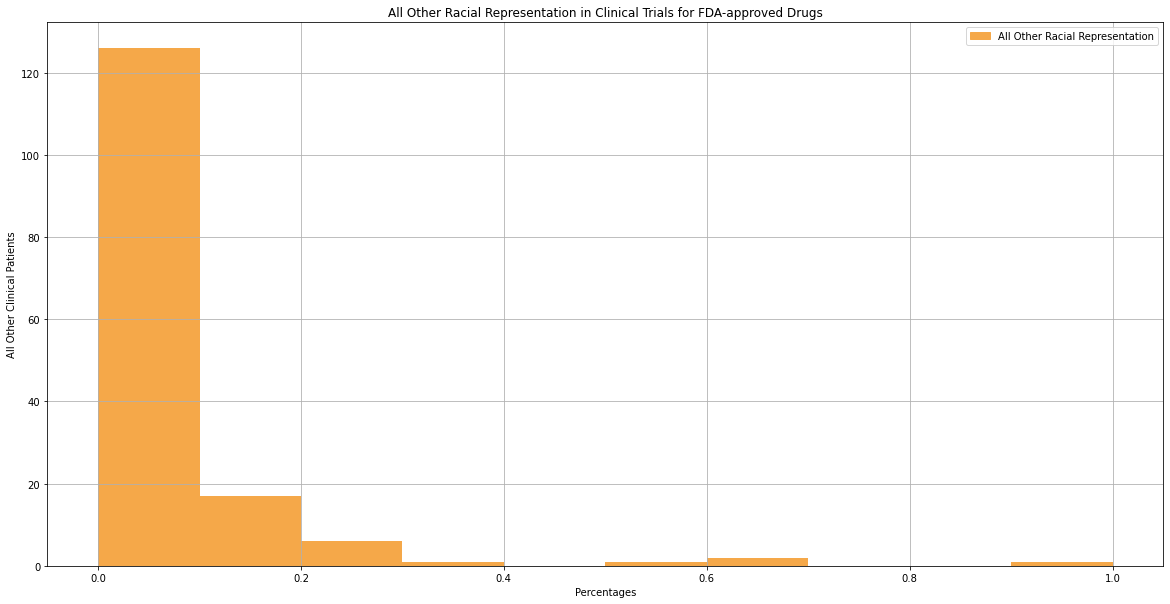

In [155]:
import matplotlib.pyplot as plt

df.hist(column='ALL OTHER (Aggregated):\nAmerican Indian or Alaska Native (AI/AN), Native Hawaiian or Other Pacific Islander (NH/OPI), Unknown/Unreported',color="#f5a849")
colors = {'All Other Racial Representation':'#f5a849'}         
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
plt.legend(handles, labels)
plt.ylabel('All Other Clinical Patients')
plt.xlabel('Percentages')
plt.title('All Other Racial Representation in Clinical Trials for FDA-approved Drugs')
plt.rcParams["figure.figsize"]=(20,10)

plt.show()

To specifically focus on the participation of Asian patients in these clinical trials, we drop columns pertaining to the data of other races (White, Black or African American, Hispanic, and All Other), gender (Women), and ages (Age ≥65, Age ≥75, Age ≥80) to narrow down our dataset. Doing so, cleans and organizes the dataset to clearly highlight the involvement of Asian patients. With the following code below, we select the certain columns we want to neglect and afterwards generate a new dataset with the remaining columns we wish to call attention to.

In [115]:
data = pd.read_csv("Clinical Trials Data, Compiled and Cleaned - [FDA] Drug Trials Snapshots_ All .csv", index_col ="BRAND NAME")

In [116]:
data.drop(["WOMEN", "WHITE","BLACK OR AFRICAN AMERICAN","ALL OTHER (Aggregated):\nAmerican Indian or Alaska Native (AI/AN), Native Hawaiian or Other Pacific Islander (NH/OPI), Unknown/Unreported","HISPANIC OR LATINO (2017 AND LATER ONLY)","UNITED STATES (2017 ONLY)","AGE\n65 and OLDER","AGE\n75 and OLDER","AGE\n80 and OLDER"], axis = 1, inplace = True)

In [117]:
data

,INDICATION,ASIAN,YEAR,NOTES
BRAND NAME,,,,
ADDYI,"Treatment of acquired, generalized hypoactive ...",1%,2015,NaN
ALECENSA,For the treatment of metastatic non-small cell...,18%,2015,NaN
ARISTADA,Treatment of schizophrenia,13%,2015,NaN
AVYCAZ,Treatment of complicated intra-abdominal infec...,27%,2015,NaN
AVYCAZ,Treatment of complicated urinary tract infecti...,10%,2015,NaN
...,...,...,...,...
TAVALISSE,Treatment of adults with low platelet count d...,3%,2018,NaN
TIBSOVO,Treatment of adults with acute myeloid leukemi...,3%,2018,NaN
TPOXX,Treatment of smallpox disease,1%,2018,NaN


To better breakdown the data collected of the participation of Asian patients in certain FDA-approved drugs, we use the code `value_counts()` to describe what is the most frequently occurring element from our dataset (descending order). 

In [72]:
df['ASIAN'].value_counts()

0.01    22
0.00    16
0.03    16
0.02     9
0.04     9
0.06     7
0.08     6
0.09     6
0.12     5
0.05     5
0.07     4
0.13     4
0.21     4
0.14     4
0.10     4
0.22     3
0.17     3
0.11     3
0.18     3
0.24     2
0.16     2
0.27     2
0.33     2
0.60     1
0.35     1
0.32     1
0.31     1
0.26     1
0.20     1
1.00     1
0.59     1
0.19     1
0.47     1
0.25     1
Name: ASIAN, dtype: int64

From this, we can see that the most frequent involvement of Asian patients in these clinical trials has been a participation percentage of 1%. To simplify even more, we sort the dataset by just filtering out what drugs only had 1% of Asian representation. This is done so by performing the code block `df[df['ASIAN']==0.01]` seen below.

In [78]:
df[df['ASIAN']==0.01]

,BRAND NAME,INDICATION,WOMEN,WHITE,BLACK OR AFRICAN AMERICAN,ASIAN,"ALL OTHER (Aggregated):\nAmerican Indian or Alaska Native (AI/AN), Native Hawaiian or Other Pacific Islander (NH/OPI), Unknown/Unreported",HISPANIC OR LATINO (2017 AND LATER ONLY),UNITED STATES (2017 ONLY),AGE\n65 and OLDER,AGE\n75 and OLDER,AGE\n80 and OLDER,YEAR,NOTES
0,ADDYI,"Treatment of acquired, generalized hypoactive ...",100%,89%,8%,0.01,2%,NaN,NaN,0%,0%,0%,2015,NaN
38,REXULTI,Treatment of major depressive disorder,69%,85%,12%,0.01,2%,NaN,NaN,<1%,0%,0%,2015,NaN
49,VELTASSA,Treatment of hyperkalemia,39%,99%,<1%,0.01,<1%,NaN,NaN,61%,21%,4%,2015,NaN
50,VIBERZI,Treatment of irritable bowel syndrome with dia...,66%,86%,12%,0.01,2%,NaN,NaN,10%,6%,<1%,2015,NaN
58,ANTHIM,For the treatment of inhalational anthrax,46%,69%,28%,0.01,2%,NaN,NaN,9%,NaN,NaN,2016,NaN
59,AXUMIN,Detection of prostate cancer recurrence,0%,31%,4%,0.01,64%,NaN,NaN,66%,NaN,NaN,2016,NaN
70,OCALIVA,Treatment of primary biliary cholangitis in ad...,91%,94%,1%,0.01,3%,NaN,NaN,19%,NaN,NaN,2016,NaN
75,VENCLEXTA,Treatment of chronic lymphocytic leukemia (CLL),31%,94%,3%,0.01,3%,NaN,NaN,58%,NaN,NaN,2016,NaN
87,BEVYXXA,Prevention of venous thromboembolism,54%,93%,2%,0.01,5%,11%,7%,90%,NaN,NaN,2017,NaN
91,EMFLAZA,Treatment of Duchenne muscular dystrophy,0%,94%,0%,0.01,5%,NR,NR,0%,NaN,NaN,2017,NaN


To again display a clean and overall better dataset that clearly shows what drugs only contain 1% of Asian representation we create a new variable named `asian_below`. Within the variable, we filter the columns to only include "Brand Name" (list of FDA-approved drugs) and "Asian" (which are set to display just the value of 0.01 or 1%).

In [118]:
asian_below=df[df['ASIAN']==0.01]
asian_below=asian_below[['BRAND NAME','ASIAN']]

# Data Analysis
After running the code block above, we're presented this dataset with just the drug names of which only contained 1% of Asian participation. In total we have 20 FDA-approved drugs that satisfy this condition. 

In [119]:
asian_below

,BRAND NAME,ASIAN
0,ADDYI,0.01
38,REXULTI,0.01
49,VELTASSA,0.01
50,VIBERZI,0.01
58,ANTHIM,0.01
59,AXUMIN,0.01
70,OCALIVA,0.01
75,VENCLEXTA,0.01
87,BEVYXXA,0.01
91,EMFLAZA,0.01


These drugs range from treatment of smallpox disease to cystic fibrosis to migraine prevention. With this information portraying what drugs have little usage/participation from Asian patients (1%), another study could be conducted to understand and conclude what health problems are of more concern for certain racial communities. 

In [156]:
asian_below.to_csv('Clinical Trial Participant Demographics - Asian Representation')